In [25]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from scipy import ndimage
from skimage.measure import regionprops
from skimage import io
from skimage.filters import threshold_otsu   # For finding the threshold for grayscale to binary conversion
import tensorflow as tf
import pandas as pd
import numpy as np
from time import time
import keras


In [26]:
import cv2 
from tqdm import tqdm
import random
import pickle



In [27]:
DIRECTORY=r"D:\data"
CATEGORIES=['real' , 'forged']

D:\data\real
D:\data\forged


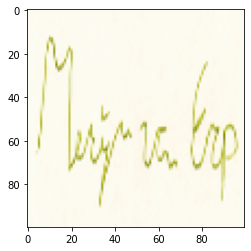

In [28]:
IMG_SIZE=100

data = [] 
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    print(folder)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])
        plt.imshow(img_arr)
        
        break

In [53]:
random.shuffle(data)

In [54]:
data[0]

[array([[[253, 252, 241],
         [253, 252, 242],
         [252, 252, 242],
         ...,
         [253, 251, 240],
         [253, 251, 240],
         [253, 251, 240]],
 
        [[253, 252, 242],
         [253, 251, 242],
         [252, 252, 242],
         ...,
         [253, 251, 239],
         [252, 252, 241],
         [253, 251, 240]],
 
        [[253, 252, 242],
         [253, 251, 241],
         [253, 251, 242],
         ...,
         [253, 251, 240],
         [252, 252, 241],
         [253, 251, 240]],
 
        ...,
 
        [[253, 252, 242],
         [253, 252, 242],
         [253, 251, 241],
         ...,
         [252, 252, 242],
         [253, 252, 241],
         [253, 251, 240]],
 
        [[253, 252, 243],
         [253, 252, 243],
         [253, 251, 240],
         ...,
         [253, 252, 242],
         [253, 252, 240],
         [253, 251, 240]],
 
        [[252, 252, 243],
         [253, 252, 243],
         [253, 251, 242],
         ...,
         [253, 251, 241],
  

In [55]:
X = []
y = []
for features, labels in data:
    X.append(features)
    y.append(labels)
    

In [80]:
X

array([[[[0.99215686, 0.98823529, 0.94509804],
         [0.99215686, 0.98823529, 0.94901961],
         [0.98823529, 0.98823529, 0.94901961],
         ...,
         [0.99215686, 0.98431373, 0.94117647],
         [0.99215686, 0.98431373, 0.94117647],
         [0.99215686, 0.98431373, 0.94117647]],

        [[0.99215686, 0.98823529, 0.94901961],
         [0.99215686, 0.98431373, 0.94901961],
         [0.98823529, 0.98823529, 0.94901961],
         ...,
         [0.99215686, 0.98431373, 0.9372549 ],
         [0.98823529, 0.98823529, 0.94509804],
         [0.99215686, 0.98431373, 0.94117647]],

        [[0.99215686, 0.98823529, 0.94901961],
         [0.99215686, 0.98431373, 0.94509804],
         [0.99215686, 0.98431373, 0.94901961],
         ...,
         [0.99215686, 0.98431373, 0.94117647],
         [0.98823529, 0.98823529, 0.94509804],
         [0.99215686, 0.98431373, 0.94117647]],

        ...,

        [[0.99215686, 0.98823529, 0.94901961],
         [0.99215686, 0.98823529, 0.94901961]

In [56]:
X = np.array(X)
y = np.array(y)

In [57]:
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [58]:
X = pickle.load(open('X.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))


In [59]:
X = X/255

In [81]:
X


array([[[[0.99215686, 0.98823529, 0.94509804],
         [0.99215686, 0.98823529, 0.94901961],
         [0.98823529, 0.98823529, 0.94901961],
         ...,
         [0.99215686, 0.98431373, 0.94117647],
         [0.99215686, 0.98431373, 0.94117647],
         [0.99215686, 0.98431373, 0.94117647]],

        [[0.99215686, 0.98823529, 0.94901961],
         [0.99215686, 0.98431373, 0.94901961],
         [0.98823529, 0.98823529, 0.94901961],
         ...,
         [0.99215686, 0.98431373, 0.9372549 ],
         [0.98823529, 0.98823529, 0.94509804],
         [0.99215686, 0.98431373, 0.94117647]],

        [[0.99215686, 0.98823529, 0.94901961],
         [0.99215686, 0.98431373, 0.94509804],
         [0.99215686, 0.98431373, 0.94901961],
         ...,
         [0.99215686, 0.98431373, 0.94117647],
         [0.98823529, 0.98823529, 0.94509804],
         [0.99215686, 0.98431373, 0.94117647]],

        ...,

        [[0.99215686, 0.98823529, 0.94901961],
         [0.99215686, 0.98823529, 0.94901961]

In [82]:
X.shape

(2, 100, 100, 3)

In [60]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [61]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [62]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [63]:
model.fit(X, y, epochs = 5, validation_split = 0.1)


Epoch 1/5
1/1 [==============================] - 0s 165ms/step - loss: 0.8187 - accuracy: 0.0000e+00 - val_loss: 7.3951 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 27ms/step - loss: 6.0159e-04 - accuracy: 1.0000 - val_loss: 13.1259 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 30ms/step - loss: 1.9073e-06 - accuracy: 1.0000 - val_loss: 17.9985 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 22.4915 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 26.5983 - val_accuracy: 0.0000e+00


In [70]:
model.save('signatureforgeryCNN.model')

INFO:tensorflow:Assets written to: signatureforgeryCNN.model\assets


In [71]:
image = r'D:\data\forged\021001_000'

def prepare(image):
    IMG_SIZE = 100
    img_arr = cv2.imread(image)
    img_arr = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
    return img_arr.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [77]:
 model=keras.models.load_model(r"C:\Users\Pragya Agrawal\signatureforgeryCNN.model")
